<a href="https://colab.research.google.com/github/llin-1123/ehhh/blob/main/Copy_of_Hodgkin_Huxley_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# channel conductances (mS)
gK = 36.0
gNa = 120.0
gL = 0.3  # leak

# ion reversal potentials (mV)
VK = -77.0
VNa = 50.0
Vl = -54.387

# membrane properties
Cm = 1.0  # capacitance (uF)

# Potassium ion-channel rate functions
def alpha_n(Vm):
    return (0.01 * (Vm + 55.0)) / (1.0 - np.exp(-0.1*(Vm+55.0)))
def beta_n(Vm):
    return (0.125 * np.exp(-0.01125*(Vm + 55.0)))

# Sodium ion-channel rate functions
def alpha_m(Vm):
    return (0.1 * (Vm + 40.0)) / (1.0 - np.exp(-0.1*(Vm+40.0)))
def beta_m(Vm):
    return 4.0 * np.exp(-0.05556*(Vm + 65.0))
def alpha_h(Vm):
    return 0.07 * np.exp(-0.05*(Vm + 65.0))
def beta_h(Vm):
    return 1.0 / (1.0 + np.exp(-0.1*(Vm + 35.0)))

# n, m, and h steady-state values
def n_inf(Vm=Vl):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))
def m_inf(Vm=Vl):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))
def h_inf(Vm=Vl):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

In [ ]:
# Initial values and simulation parameters
dt = 0.01 #time step (ms)
tot_steps = 50000 # total number of steps
Vm = Vl #initial voltage
m = m_inf(Vm) #initial m
n = n_inf(Vm) #initial n
h = h_inf(Vm) #initial h
Vt = np.zeros(tot_steps) #define Vm for plot
mt = np.zeros(tot_steps) #define m for plot
nt = np.zeros(tot_steps) #define n for plot
ht = np.zeros(tot_steps) #define h for plot
tr = np.zeros(tot_steps) #define tr for plot (time in ms)
Vt[0] = Vm #initial Vm for plot
mt[0] = m #initial m for plot
nt[0] = n #initial n for plot
ht[0] = h #initial h for plot

# External current
Id = np.random.normal(0.0,15.0,tot_steps) #current as Gaussian noise
#Id = np.full(tot_steps,1.47) #current as constant
#Id[0:20000] = 0.0
#Id[80000:100000] = 0.0

# Simulation
for iter in range(1,tot_steps): #number of iterations
  tau_m = 1.0/(alpha_m(Vm)+beta_m(Vm)) #update tau_m(V)
  m_inf = alpha_m(Vm)/(alpha_m(Vm)+beta_m(Vm)) #update m_inf(V)
  tau_n = 1.0/(alpha_n(Vm)+beta_n(Vm)) #update tau_n(V)
  n_inf = alpha_n(Vm)/(alpha_n(Vm)+beta_n(Vm)) #update n_inf(V)
  tau_h = 1.0/(alpha_h(Vm)+beta_h(Vm)) #update tau_h(V)
  h_inf = alpha_h(Vm)/(alpha_h(Vm)+beta_h(Vm)) #update h_inf(V)

  m = np.exp(-dt/tau_m)*m + (1.0-np.exp(-dt/tau_m))*m_inf #update m
  n = np.exp(-dt/tau_n)*n + (1.0-np.exp(-dt/tau_n))*n_inf #update n
  h = np.exp(-dt/tau_h)*h + (1.0-np.exp(-dt/tau_h))*h_inf #update h
  Vm = Vm + ((dt/Cm)*(-(gK*np.power(n,4.0)*(Vm-VK) + gNa*np.power(m,3.0)*h*(Vm-VNa) + gL*(Vm-Vl)) + Id[iter])) #update V (mV)
  tr[iter] = iter*dt #update time in ms for plot
  Vt[iter] = Vm #update Vm in mV for plot
  mt[iter] = m
  nt[iter] = n
  ht[iter] = h

<Figure size 640x480 with 0 Axes>

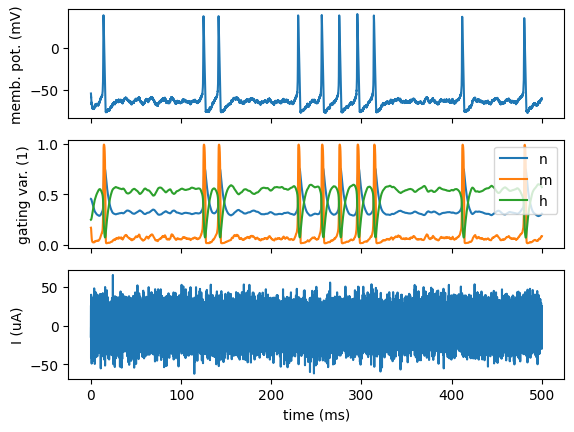

In [ ]:
# Plotting
plt.figure()

fig, axs = plt.subplots(3, sharex=True, sharey=False)
axs[0].plot(tr, Vt)
axs[1].plot(tr, nt, label="n")
axs[1].plot(tr, mt, label="m")
axs[1].plot(tr, ht, label="h")
axs[1].legend()
axs[2].plot(tr, Id)

axs[0].set_ylabel('memb. pot. (mV)')
axs[1].set_ylabel('gating var. (1)')
axs[2].set_ylabel('I (uA)')
axs[2].set_xlabel('time (ms)')

# Show plot
plt.show()